In [1]:
!pip install git+https://github.com/pycaret/pycaret.git@master --upgrade

  Cloning https://github.com/pycaret/pycaret.git (to revision master) to /tmp/pip-req-build-xaksnxf9
  Running command git clone --filter=blob:none --quiet https://github.com/pycaret/pycaret.git /tmp/pip-req-build-xaksnxf9
  Resolved https://github.com/pycaret/pycaret.git to commit 58ec3c282d58e94727f9d5b77b49f241e9103ab3
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done


In [2]:
from pycaret.datasets import get_data
# Do multiclass classification on Iris dataset
data = get_data('iris')

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
#Set up model
from pycaret.classification import *
clf1 = setup(data, target = 'species', session_id=123, log_experiment=False, experiment_name='iris1')

,Description,Value
0,Session id,123
1,Target,species
2,Target type,Multiclass
3,Target mapping,"Iris-setosa: 0, Iris-versicolor: 1, Iris-virginica: 2"
4,Original data shape,"(150, 5)"
5,Transformed data shape,"(150, 5)"
6,Transformed train set shape,"(105, 5)"
7,Transformed test set shape,"(45, 5)"
8,Numeric features,4
9,Preprocess,True


In [4]:
best = compare_models(fold=5)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lr,Logistic Regression,0.9714,0.0000,0.9714,0.9750,0.9713,0.9571,0.9590,1.4140
qda,Quadratic Discriminant Analysis,0.9714,0.0000,0.9714,0.9750,0.9713,0.9571,0.9590,0.0360
lda,Linear Discriminant Analysis,0.9714,0.0000,0.9714,0.9750,0.9713,0.9571,0.9590,0.0300
knn,K Neighbors Classifier,0.9619,0.9850,0.9619,0.9667,0.9617,0.9429,0.9454,0.0560
et,Extra Trees Classifier,0.9619,0.9959,0.9619,0.9667,0.9617,0.9429,0.9454,0.1900
lightgbm,Light Gradient Boosting Machine,0.9524,0.9912,0.9524,0.9560,0.9522,0.9286,0.9305,0.1100
nb,Naive Bayes,0.9429,0.9959,0.9429,0.9452,0.9428,0.9143,0.9156,0.0340
rf,Random Forest Classifier,0.9429,0.9959,0.9429,0.9495,0.9424,0.9143,0.9179,0.2760
xgboost,Extreme Gradient Boosting,0.9429,0.9810,0.9429,0.9476,0.9427,0.9143,0.9168,0.0700
dt,Decision Tree Classifier,0.9333,0.9500,0.9333,0.9407,0.9327,0.9000,0.9042,0.0360


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

In [5]:
evaluate_model(best)



interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

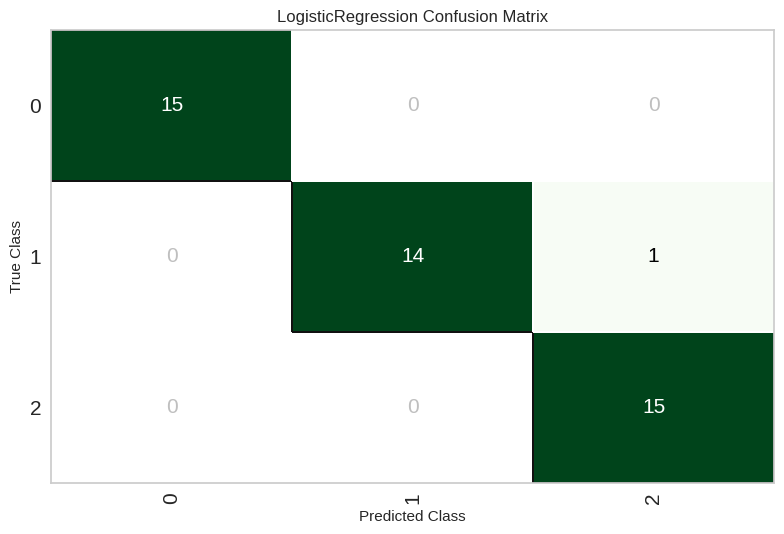

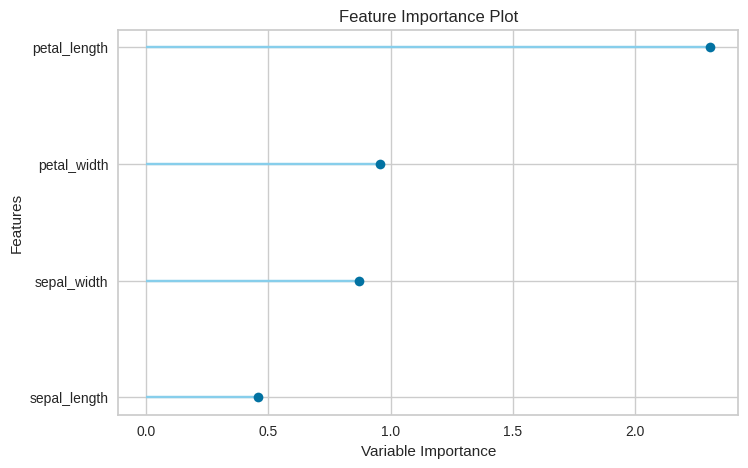

In [6]:
plot_model(best, plot='confusion_matrix')
plot_model(best, plot='feature')

In [7]:
#Finalize
tuned = tune_model(best)
final = finalize_model(tuned)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9091,0.0000,0.9091,0.9273,0.9076,0.8625,0.8735
1,1.0000,0.0000,1.0000,1.0000,1.0000,1.0000,1.0000
2,0.9091,0.0000,0.9091,0.9273,0.9076,0.8625,0.8735
3,1.0000,0.0000,1.0000,1.0000,1.0000,1.0000,1.0000
4,1.0000,0.0000,1.0000,1.0000,1.0000,1.0000,1.0000
5,0.9000,0.0000,0.9000,0.9250,0.8971,0.8485,0.8616
6,1.0000,0.0000,1.0000,1.0000,1.0000,1.0000,1.0000
7,1.0000,0.0000,1.0000,1.0000,1.0000,1.0000,1.0000
8,1.0000,0.0000,1.0000,1.0000,1.0000,1.0000,1.0000


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


In [8]:
preds = predict_model(final)
preds.head()


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Logistic Regression,0.9778,1.0000,0.9778,0.9792,0.9778,0.9667,0.9674


,sepal_length,sepal_width,petal_length,petal_width,species,prediction_label,prediction_score
72,6.3,2.5,4.9,1.5,Iris-versicolor,Iris-versicolor,0.5960
125,7.2,3.2,6.0,1.8,Iris-virginica,Iris-virginica,0.9485
80,5.5,2.4,3.8,1.1,Iris-versicolor,Iris-versicolor,0.9572
86,6.7,3.1,4.7,1.5,Iris-versicolor,Iris-versicolor,0.8053
117,7.7,3.8,6.7,2.2,Iris-virginica,Iris-virginica,0.9964


In [9]:
save_model(final, 'multiclass_iris')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('label_encoding',
                  TransformerWrapperWithInverse(exclude=None, include=None,
                                                transformer=LabelEncoder())),
                 ('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['sepal_length', 'sepal_width',
                                              'petal_length', 'petal_width'],
                                     transformer=SimpleImputer(add_indicator=False,
                                                               copy=True,
                                                               fill_value=None,
                                                               keep_empt...
                                                               fill_value=None,
                                                               keep_empty_features=False,
                                         

In [18]:
import numpy as np
import pandas as pd # Import pandas

x = np.array([[7.7, 3.8, 6.7, 2.2]], dtype=float)

# Convert the NumPy array to a pandas DataFrame with appropriate column names
feature_names = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
x_df = pd.DataFrame(x, columns=feature_names)

probs = final.predict_proba(x_df) # Use the DataFrame as input
test = final.predict(x_df)
# probs
test[0]

'Iris-virginica'

#Gradio UI

In [19]:
import joblib
model = joblib.load('/content/multiclass_iris.pkl')

In [ ]:
import gradio as gr

# === Prediction function ===
def predict(sepal_length, sepal_width, petal_length, petal_width):
    x = np.array([[sepal_length, sepal_width, petal_length, petal_width]], dtype=float)
    feature_names = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
    x_df = pd.DataFrame(x, columns=feature_names)
    pred = model.predict(x_df)[0]
    print('label:' + str(pred))
    return str(pred)

# === Pretty Gradio UI ===
custom_css = """
.app-wrap {max-width: 880px !important; margin: auto;}
.header {
  background: linear-gradient(135deg, #7c3aed 0%, #06b6d4 100%);
  color: white; border-radius: 18px; padding: 24px; margin-bottom: 12px;
  box-shadow: 0 10px 30px rgba(0,0,0,0.08);
}
.header h1 {margin: 0 0 6px 0; font-size: 28px; font-weight: 800; letter-spacing: .2px;}
.header p {margin: 0; opacity: .95}
.card {
  border-radius: 18px; padding: 18px; background: #fff;
  box-shadow: 0 10px 25px rgba(0,0,0,0.06); border: 1px solid rgba(0,0,0,0.04);
}
.output-chip {
  display: inline-flex; align-items: center; gap: 10px;
  padding: 14px 18px; border-radius: 14px; background: #f8fafc; border: 1px solid #e5e7eb;
  font-weight: 600; font-size: 18px;
}
.note {color: #6b7280; font-size: 12px; margin-top: 6px}
footer {text-align: center; color: #94a3b8; font-size: 12px; margin-top: 10px}
"""

with gr.Blocks(theme=gr.themes.Soft(), css=custom_css, fill_height=True) as demo:
    with gr.Column(elem_classes="app-wrap"):
        gr.HTML(
            """
            <div class="header">
              <h1>Iris Classifier</h1>
              <p>Enter flower measurements to predict the Iris species.</p>
            </div>
            """
        )

        with gr.Row():
            with gr.Column(scale=3):
                with gr.Group(elem_classes="card"):
                    sl = gr.Number(label="Sepal Length (cm)", value=5.1, precision=2)
                    sw = gr.Number(label="Sepal Width (cm)",  value=3.5, precision=2)
                    pl = gr.Number(label="Petal Length (cm)", value=1.4, precision=2)
                    pw = gr.Number(label="Petal Width (cm)",  value=0.2, precision=2)
                    submit = gr.Button("Predict", variant="primary", size="lg")

                    gr.Markdown(
                        "#### Tips\n"
                        "- Typical ranges: sepal length 4.3–7.9, sepal width 2.0–4.4, "
                        "petal length 1.0–6.9, petal width 0.1–2.5",
                        elem_classes="note"
                    )

            with gr.Column(scale=2):
                with gr.Group(elem_classes="card"):
                    label_out = gr.Textbox(label="Predicted Label", interactive=False)

        gr.Examples(
            examples=[
                [5.1, 3.5, 1.4, 0.2],
                [6.4, 3.2, 4.5, 1.5],
                [6.9, 3.1, 5.4, 2.1],
            ],
            inputs=[sl, sw, pl, pw],
            label="Examples"
        )

        submit.click(
            predict,
            inputs=[sl, sw, pl, pw],
            outputs=[label_out]
        )

        gr.Markdown("<footer>Model loaded from <code>iris_model.pkl</code>.</footer>")

demo.launch(debug=True, share=True)

Colab notebook detected. This cell will run indefinitely so that you can see errors and logs. To turn off, set debug=False in launch().
* Running on public URL: https://9befdfe3be9d0bd696.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


label:Iris-setosa
